# 0. Import the necessary Libraries

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# 1. Data Collection

In [448]:
filePath = "sales-data.csv"
data = pd.read_csv(filePath)

# 2. Data preparation
# 2.1 Data overview

In [449]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [450]:
#data = data.drop(columns=["Customer ID","Customer Name","Product Name",])
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [451]:
data.shape

(9800, 18)

In [452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [453]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [454]:
# Check Missing data
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [455]:
data.shape

(9800, 18)

In [456]:
# check for duplicate rows.
if data.duplicated().sum() > 0:
    data = data.drop_duplicates()
data.shape
# no duplicates found

(9800, 18)

In [457]:
data.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [458]:
# check top 10 customer those have the highest number of transactions
#data['Customer Name'].value_counts().head(10)

In [459]:
# check total ammount of Sales
data['Sales'].sum()

2261536.7827000003

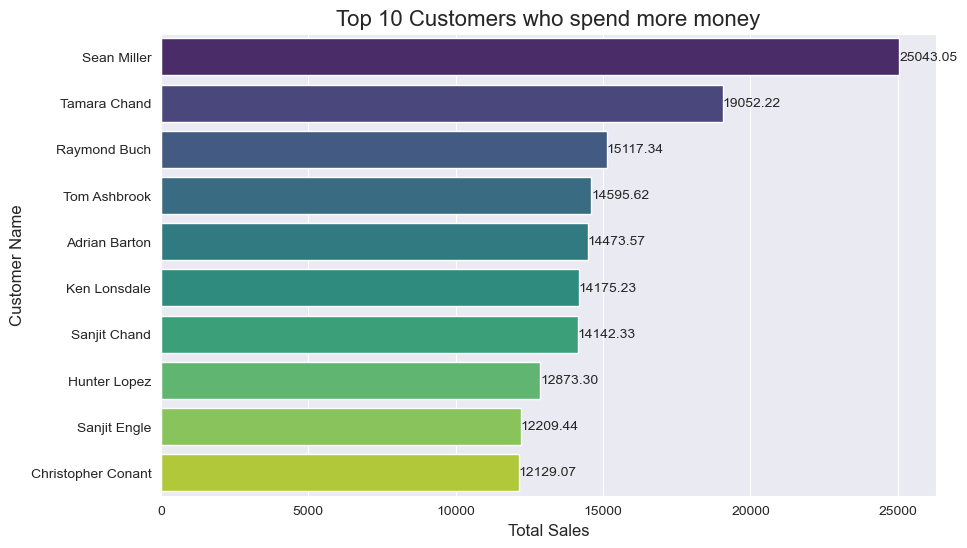

In [460]:
# check top 10 customers who spend more money
df1 = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=df1.values, y=df1.index, palette='viridis')

plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.title('Top 10 Customers who spend more money', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)

plt.show()

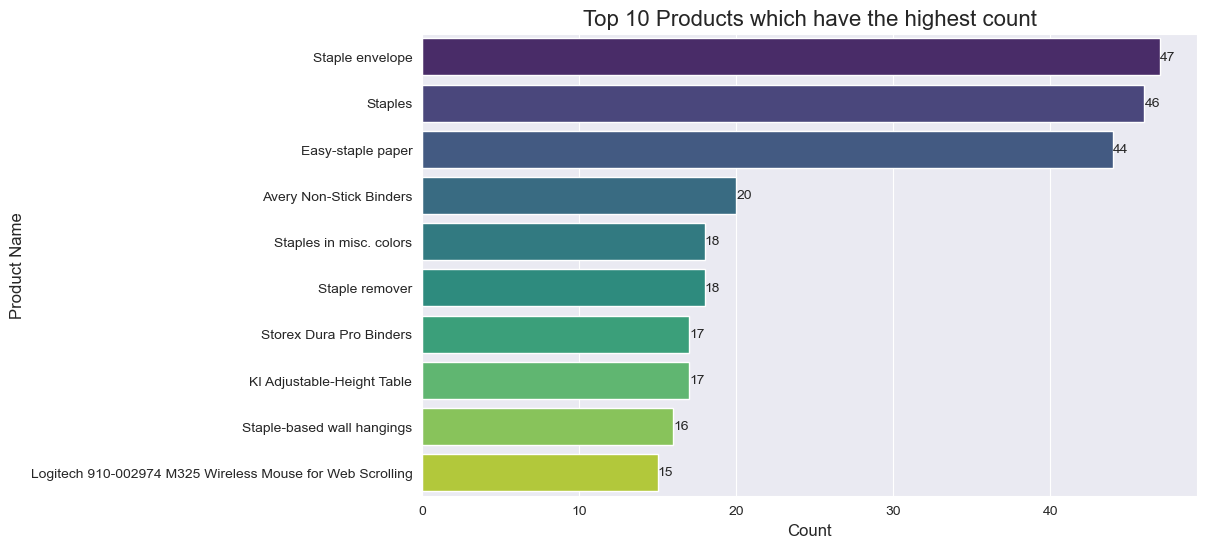

In [461]:
# check top 10 products which have the highest sales

plt.figure(figsize=(10, 6))
sns.countplot(y='Product Name', data=data, order=data['Product Name'].value_counts().head(10).index, palette='viridis')
plt.bar_label(plt.gca().containers[0])
plt.title('Top 10 Products which have the highest count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

plt.show()


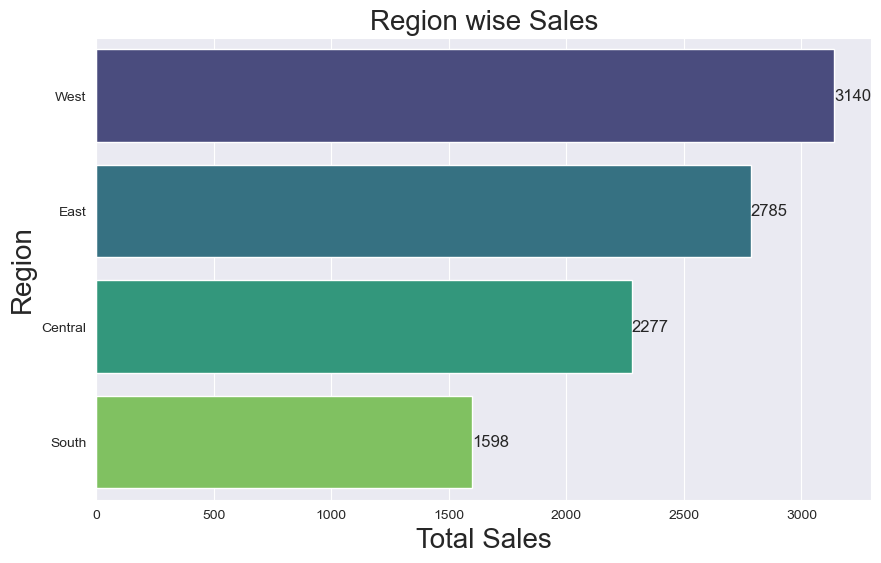

In [462]:
# chek which region has the highest sales
df2 = data.groupby('Region')['Sales'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=df2.values, y=df2.index, palette='viridis')

plt.bar_label(plt.gca().containers[0], fontsize=12)
plt.title('Region wise Sales', fontsize=20)
plt.xlabel('Total Sales', fontsize=20)
plt.ylabel('Region', fontsize=20)

plt.show()


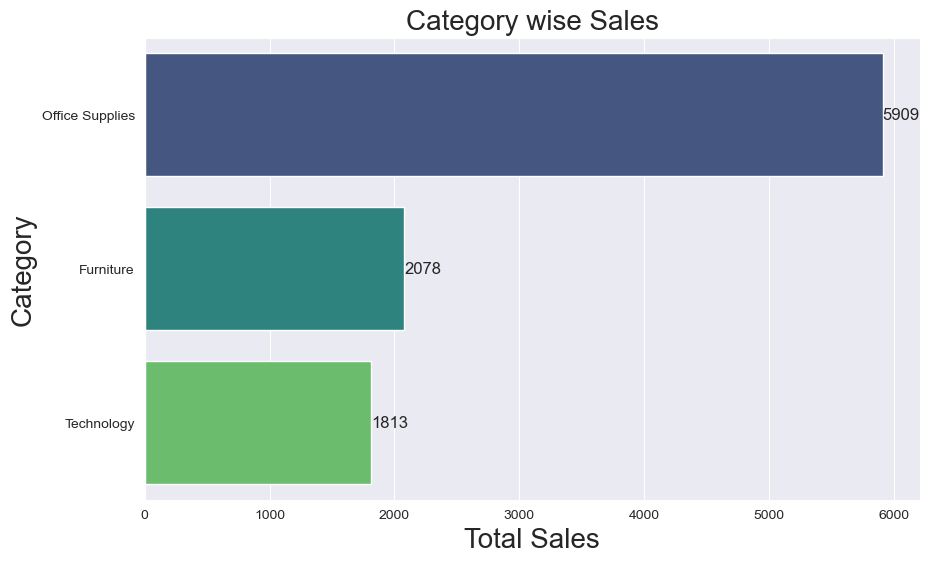

In [463]:
# check which category has the highest sales
df3 = data.groupby('Category')['Sales'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=df3.values, y=df3.index, palette='viridis')

plt.bar_label(plt.gca().containers[0], fontsize=12)
plt.title('Category wise Sales', fontsize=20)
plt.xlabel('Total Sales', fontsize=20)
plt.ylabel('Category', fontsize=20)

plt.show()


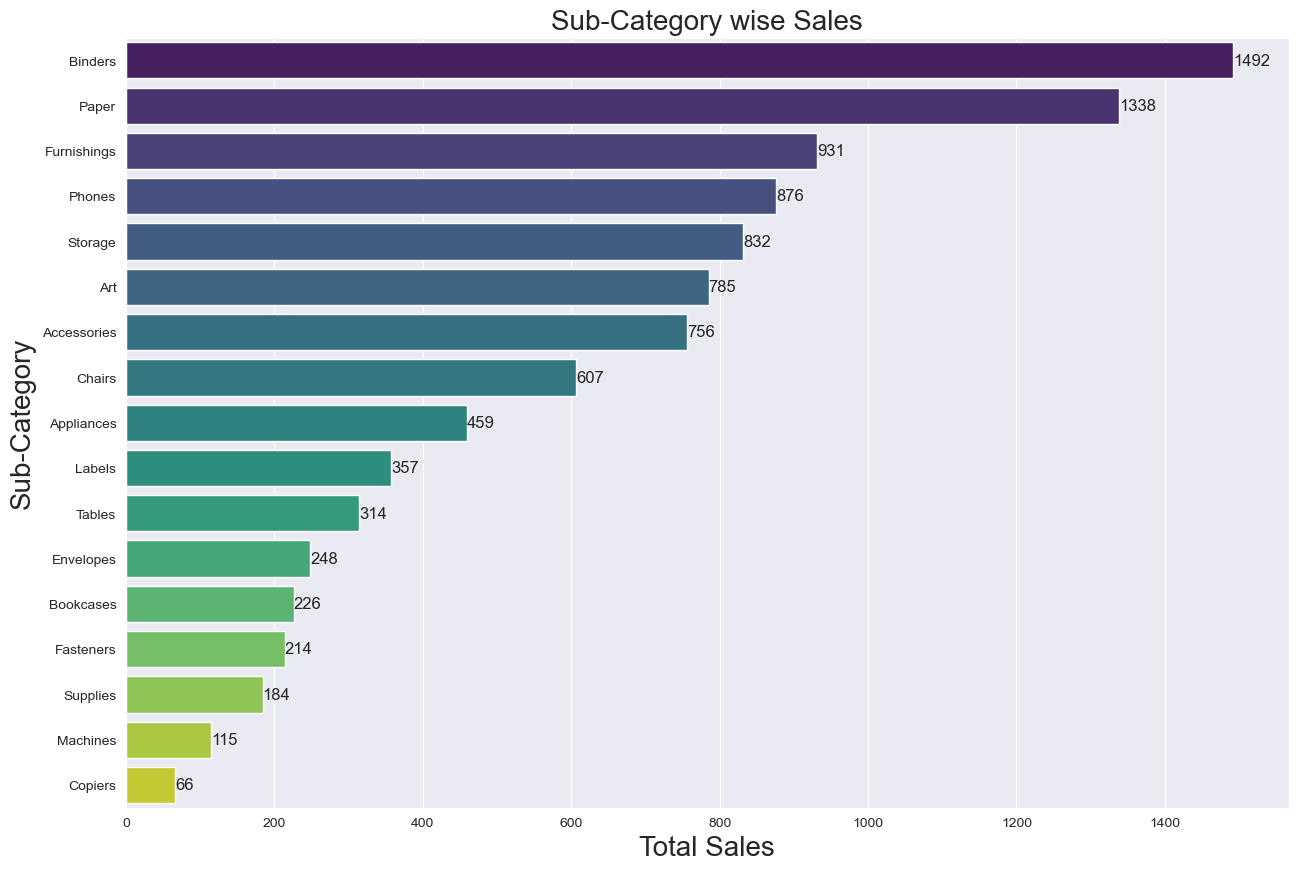

In [464]:
# check which sub-category has the highest sales
df4 = data.groupby('Sub-Category')['Sales'].count().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x=df4.values, y=df4.index, palette='viridis')

plt.bar_label(plt.gca().containers[0], fontsize=12)
plt.title('Sub-Category wise Sales', fontsize=20)
plt.xlabel('Total Sales', fontsize=20)
plt.ylabel('Sub-Category', fontsize=20)

plt.show()

In [465]:
# Dropping the column 'Row ID', as it does not help much in the process of data analysis of the dataset.
data.drop('Row ID', axis=1, inplace=True)
#converting the data type of 'Order Date' column to date time format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
#converting the data type of 'Ship Date' column to date time format
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [466]:
print('Order Date Description\n')
print(data['Order Date'].describe())  #Displays the distribution of dates in 'Order Data' column
print('\nShip Date Description\n')
print(data['Ship Date'].describe())  #Displays the distribution of dates in 'Ship Data' column

Order Date Description

count                    9800
unique                   1230
top       2017-09-05 00:00:00
freq                       38
first     2015-01-03 00:00:00
last      2018-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count                    9800
unique                   1326
top       2018-09-26 00:00:00
freq                       34
first     2015-01-07 00:00:00
last      2019-01-05 00:00:00
Name: Ship Date, dtype: object


In [467]:
#sorting data by order date
data.sort_values(by=['Order Date'], inplace=True,
                 ascending=True)  #Sorting data by  ascending order of the coloumn values 'Order Date'
data.set_index("Order Date",
               inplace=True)  #Setting 'Order Date' as index of the dataframe for ease of Time Series Analysis

In [468]:
updated_data = data.drop(
    columns=["Order ID", "Ship Date", "Customer ID", "Customer Name", "Country", "City", "State", "Product ID",
             "Product Name"])
updated_data

,Ship Mode,Segment,Postal Code,Region,Category,Sub-Category,Sales
Order Date,,,,,,,
2015-01-03,Standard Class,Consumer,77095.0,Central,Office Supplies,Paper,16.448
2015-01-04,Standard Class,Home Office,60540.0,Central,Office Supplies,Binders,3.540
2015-01-04,Standard Class,Home Office,60540.0,Central,Office Supplies,Storage,272.736
2015-01-04,Standard Class,Home Office,60540.0,Central,Office Supplies,Labels,11.784
2015-01-05,Standard Class,Consumer,19143.0,East,Office Supplies,Art,19.536
...,...,...,...,...,...,...,...
2018-12-30,Standard Class,Corporate,94533.0,West,Office Supplies,Binders,20.720
2018-12-30,Standard Class,Consumer,10009.0,East,Furniture,Bookcases,323.136
2018-12-30,Standard Class,Home Office,47201.0,Central,Office Supplies,Appliances,209.300


In [469]:
ship_mode_category = updated_data[["Ship Mode"]]
ship_mode_category.value_counts()

Ship Mode     
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
dtype: int64

In [481]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_encoder = OneHotEncoder(sparse=False)

ct = ColumnTransformer([
    ("step1", OneHotEncoder(sparse=False, handle_unknown=), ["Ship Mode", "Segment", "Postal Code", "Region", "Category", "Sub-Category"])
], remainder='passthrough')

transformed_data = ct.fit_transform(updated_data)
transformed_data

array([[  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,  16.448],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   3.54 ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 272.736],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 209.3  ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,  52.776],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   3.024]])

# Data split

In [480]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x = transformed_data
x

array([[  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,  16.448],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   3.54 ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 272.736],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 209.3  ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,  52.776],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   3.024]])

In [477]:

y = updated_data["Sales"].copy()
y

Order Date
2015-01-03     16.448
2015-01-04      3.540
2015-01-04    272.736
2015-01-04     11.784
2015-01-05     19.536
               ...   
2018-12-30     20.720
2018-12-30    323.136
2018-12-30    209.300
2018-12-30     52.776
2018-12-30      3.024
Name: Sales, Length: 9800, dtype: float64

# Training data

In [472]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=42)

## Predict

In [479]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
y_pred = model.predict(x_test)
y_pred

array([166.5995777 ,  31.07871295,  40.61700427, ..., 344.58027417,
        29.35528373, 330.7433297 ])

In [478]:
#RMSE (Root Mean Square Error)

mean_squared_error(y_test, y_pred)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


y_test


RMSE:  58.135


Order Date
2015-06-01     166.720
2015-08-12      31.104
2015-09-22      40.680
2016-04-17     323.370
2017-01-11      54.992
                ...   
2018-12-20      34.020
2015-10-31    1604.900
2016-11-02     344.704
2018-12-23      29.312
2017-11-27     331.023
Name: Sales, Length: 1960, dtype: float64

In [475]:
y_pred

array([166.5995777 ,  31.07871295,  40.61700427, ..., 344.58027417,
        29.35528373, 330.7433297 ])

In [ ]:
x_train